Laboratorio de LP de tipagem dinamica #2
===

Aquecimento
===========

O **trecho de código a seguir** abre um arquivo CSV disponibilizado pelo professor no seu espaço pessoal no GitHub usando a biblioteca *`pandas`* (ver http://pandas.pydata.org/ para detalhes).

O arquivo contém um trecho dos dados do ENADE de 2014.

Os **dados originais** podem ser obtidos em:
http://dados.gov.br/dataset/microdados-do-exame-nacional-de-desempenho-de-estudantes-enade

Em especial, para este exemplo, foram obtidos os dados de 2014:
http://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2014.zip

Eles foram coletados, extraídos e disponibilizados na UR especificada no próprio código. Execute-o e perceba que **é muito simples coletar dados disponibilizados na Web!**

Lembre-se de que para executar um codigo eh necessario selecionar a celula que o contem e utilizar o botao "play" no menu superior. Voce tambem pode mandar executar todas as celulas de uma unica vez escolhendo a opcao "Run all" no menu "Cell". 

In [4]:
import pandas as pd
import zipfile
import requests
import io

filename = '2014.csv'
uri = 'http://raw.githubusercontent.com/lwives/mlp/master/' + filename

print("Pegando o conteúdo do arquivo: ", uri)    
content = requests.get(uri).content

print('Arquivo lido!')

Pegando o conteúdo do arquivo:  http://raw.githubusercontent.com/lwives/mlp/master/2014.csv
Arquivo lido!


In [5]:
# se desejar ver o conteúdo do arquivo lido, descomente a linha seguinte e execute a célula

# print(content.decode('utf-8'))

**O trecho seguinte complementa o anterior, transformando os dados coletados em uma representação interna (dataframe), para que possam ser manipulados:**

In [10]:
df = pd.read_csv(io.StringIO(content.decode('utf-8')))

# Detalhes sobre funcionamento do pandas.read_csv em:
# http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table 
df = pd.read_csv(uri, sep=";")

**O trecho seguinte mostra algumas informações do arquivo lido (colunas/atributos): **

In [11]:
print("Attributes found:", df.columns.values) # mostra as colunas (atributos) que foram identificadas e lidas do arquivo

print("\n Attributes and types:\n", df.dtypes) # mostra atributos lidos e respectivos tipos identificados

print("\nNumber of Elements and attributes read:", df.shape) # mostra dimensões dos dados lidos

Attributes found: ['nu_ano' 'co_ies' 'co_uf_curso' 'nu_idade' 'tp_sexo' 'ano_fim_2g'
 'ano_in_grad' 'tp_pres' 'tp_pr_ger' 'tp_pr_ob_fg' 'tp_pr_di_fg'
 'tp_pr_ob_ce' 'tp_pr_di_ce' 'tp_sfg_d1' 'tp_sfg_d2' 'tp_sce_d1'
 'tp_sce_d2' 'tp_sce_d3' 'nt_obj_fg' 'nt_fg_d1_pt' 'nt_fg_d1_ct'
 'nt_fg_d1' 'nt_fg_d2_pt' 'nt_fg_d2_ct' 'nt_fg_d2' 'nt_dis_fg' 'nt_fg'
 'nt_obj_ce' 'nt_ce_d1' 'nt_ce_d2' 'nt_ce_d3' 'nt_dis_ce' 'nt_ce' 'nt_ger']

 Attributes and types:
 nu_ano           int64
co_ies           int64
co_uf_curso      int64
nu_idade         int64
tp_sexo         object
ano_fim_2g       int64
ano_in_grad      int64
tp_pres          int64
tp_pr_ger        int64
tp_pr_ob_fg      int64
tp_pr_di_fg      int64
tp_pr_ob_ce      int64
tp_pr_di_ce      int64
tp_sfg_d1        int64
tp_sfg_d2        int64
tp_sce_d1        int64
tp_sce_d2        int64
tp_sce_d3        int64
nt_obj_fg      float64
nt_fg_d1_pt      int64
nt_fg_d1_ct      int64
nt_fg_d1         int64
nt_fg_d2_pt      int64
nt_fg_d2_ct      in

**A definição de o que significa cada coluna está disponível no portal do INEP (mais especificamente em uma subpasta dentro do arquivo disponível em http://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2014.zip).**

**O trecho seguinte mostra um sumário estatístico do arquivo:**

In [12]:
# mostra primeiros 5 registros lidos do arquivo
print(df.head())

# print(df) # mostra todos os dados lidos 

   nu_ano  co_ies  co_uf_curso  nu_idade tp_sexo  ano_fim_2g  ano_in_grad  \
0    2014       1           51        23       M        2007         2010   
1    2014       1           51        24       M        2007         2010   
2    2014       1           51        22       F        2009         2010   
3    2014       1           51        24       F        2007         2010   
4    2014       1           51        23       F        2008         2010   

   tp_pres  tp_pr_ger  tp_pr_ob_fg   ...    nt_fg_d2  nt_dis_fg  nt_fg  \
0      555        555          555   ...          67       74.5   67.3   
1      555        555          555   ...           0        0.0   37.5   
2      555        555          555   ...          93       94.0   75.1   
3      555        555          555   ...          83       71.5   81.1   
4      555        555          555   ...          80       86.0   86.9   

   nt_obj_ce  nt_ce_d1  nt_ce_d2  nt_ce_d3  nt_dis_ce  nt_ce  nt_ger  
0       71.4        9

In [13]:
df.describe()

,nu_ano,co_ies,co_uf_curso,nu_idade,ano_fim_2g,ano_in_grad,tp_pres,tp_pr_ger,tp_pr_ob_fg,tp_pr_di_fg,...,nt_fg_d2,nt_dis_fg,nt_fg,nt_obj_ce,nt_ce_d1,nt_ce_d2,nt_ce_d3,nt_dis_ce,nt_ce,nt_ger
count,191.0,191.000000,191.000000,191.000000,191.000000,191.000000,191.0,191.0,191.0,191.000000,...,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,2014.0,2.068063,46.167539,24.246073,2007.073298,2009.376963,555.0,555.0,555.0,518.968586,...,47.157068,52.832461,62.716754,57.665445,21.596859,23.115183,8.324607,17.681675,51.663874,54.438743
std,0.0,0.768167,12.111030,3.584642,3.331646,1.162707,0.0,0.0,0.0,82.073004,...,35.435879,29.754667,17.261845,14.302858,27.389775,21.627403,14.665368,15.546007,13.009956,12.278225
min,2014.0,1.000000,13.000000,21.000000,1980.000000,2005.000000,555.0,555.0,555.0,333.000000,...,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,0.000000,0.000000,12.200000,16.700000
25%,2014.0,2.000000,51.000000,23.000000,2007.000000,2009.000000,555.0,555.0,555.0,555.000000,...,0.000000,36.000000,52.050000,52.400000,0.000000,0.000000,0.000000,0.850000,44.500000,47.250000
50%,2014.0,2.000000,53.000000,24.000000,2008.000000,2010.000000,555.0,555.0,555.0,555.000000,...,58.000000,62.500000,65.100000,57.100000,0.000000,20.000000,0.000000,16.700000,52.600000,55.500000
75%,2014.0,2.000000,53.000000,25.000000,2009.000000,2010.000000,555.0,555.0,555.0,555.000000,...,78.000000,75.000000,75.050000,66.700000,40.000000,35.000000,10.000000,28.300000,60.650000,63.350000
max,2014.0,4.000000,53.000000,51.000000,2011.000000,2012.000000,555.0,555.0,555.0,555.000000,...,98.000000,97.000000,94.200000,90.500000,90.000000,90.000000,80.000000,60.000000,79.600000,79.600000


**Perceba que alguns atributos são *categóricos* e algumas das métricas não fazem sentido (p. ex., média para o ano). Mas podemos mudar a semântica dos atributos... **

**Por exemplo, o trecho seguinte cria um novo atributo chamado "ano", tendo como base o atributo "nu_ano", mas em formato categórico. Depois, solicita para gerar dados estatísticos deste novo atributo:**

In [8]:
df["ano"] = df["nu_ano"].astype("category")
df["ano"].describe()

count      191
unique       1
top       2014
freq       191
Name: ano, dtype: int64

**Também podemos pegar um subconjunto dos dados ou um dos atributos e colocá-los em ordem. O trecho de código seguinte seleciona a coluna relativa ao ano de conclusão do 2o grau e mostra os registros em ordem crescente, por este campo:**

In [9]:
df['ano_fim_2g'].sort_values()

54     1980
158    1981
162    1998
136    1999
102    1999
150    1999
27     2002
104    2003
52     2004
40     2004
60     2004
62     2004
101    2004
177    2004
56     2005
38     2005
119    2005
88     2005
20     2005
51     2005
144    2005
74     2005
172    2006
94     2006
180    2006
140    2006
148    2006
107    2006
65     2006
137    2006
       ... 
189    2009
159    2009
19     2009
126    2009
66     2009
132    2009
125    2009
134    2009
124    2009
123    2009
53     2009
122    2009
49     2009
17     2009
141    2009
81     2009
103    2009
30     2009
152    2009
28     2009
154    2009
24     2009
157    2009
21     2009
127    2009
160    2009
47     2009
190    2009
58     2010
6      2011
Name: ano_fim_2g, dtype: int64

**Já o trecho seguinte cria uma nova tabela (data-frame) que contém as notas gerais dos alunos (Nota bruta da prova, i.e., a média ponderada da formação geral (25%) e componente específico (75%) (0 a 100)), ordenada por ano de finalização do 2o grau:**

In [17]:
df2 = df[['ano_fim_2g','nt_ger']]
df2.sort_values(by='ano_fim_2g')

,ano_fim_2g,nt_ger
54,1980,53.4
158,1981,45.0
162,1998,53.1
136,1999,73.6
102,1999,61.8
150,1999,38.9
27,2002,64.2
104,2003,39.1
52,2004,79.6
40,2004,54.9


**Você também pode visualizar os dados de diferentes maneiras... **

**O exemplo seguinte mostra a média das notas agrupadas por ano de conclusão do 2o grau. **

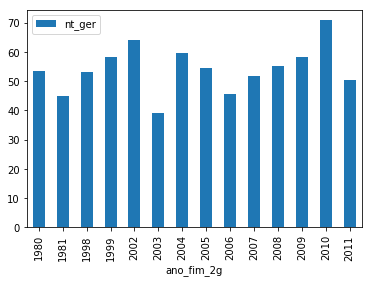

In [18]:
# o comando seguinte indica ao jupyter que o grafico sera gerado na propria celula (ao inves de salvar em uma arquivo)
%matplotlib inline

df3 = df2.groupby('ano_fim_2g').mean() # agrupa por ano de finalizacao e calcula a media
df3.plot.bar() # mostra o resultado (media da nota geral, por ano de conclusao)

#o grafico pode demorar um pouco para aparecer da primeira vez

**Para ter uma ideia dos tipos de visualização disponíveis, consulte: 
http://pandas.pydata.org/pandas-docs/version/0.9.0/visualization.html**

**Para uma visão geral (de 10 minutos) sobre o que você pode fazer com a biblioteca "Pandas", consulte: http://pandas.pydata.org/pandas-docs/stable/10min.html**

**Se tiver dúvidas sobre Python, consulte o bloco de notas sobre Python básico disponibilizado pelo professor, no Moodle.**

**Atenção**: **Os exemplos anteriores foram realizados em cima de um subconjunto dos dados. Se você trocar o nome do arquivo para `'microdados_enade_2014.csv'`, no mesmo local onde o professor disponibilizou o arquivo `'2014.csv'`, terá acesso aos dados (e atributos) completos do ano de 2014.**

----
Exercicio: 
============
**Agora que voce ja sabe como abrir arquivos contendo dados (ao menos em formato CSV), crie um novo notebook (ou use o bloco abaixo deste) que seja capaz de extrair e analisar as informacoes contidas no arquivo de dados fornecido pelo professor ('extratoppgc.csv').**

**Seguem detalhes:**

- **Baixe o arquivo de dados entitulado 'extratoppgc.csv', disponibilizado na atividade, no Moodle. Ele contem um trecho das informacoes sobre a producao academico-cientifica dos professores do Instituto de Informatica;**
- **Suba esse arquivo na plataforma Jupyter. Se estiver usando o notebooks.azure.com, vah ao menu 'Data > Upload' e suba-o;** 
- **Depois de ter encaminhado o arquivo, use o código seguinte para carrega-lo:** 

In [8]:
import pandas as pd

arquivo = 'extratoppgc.csv' # local onde esta o arquivo de dados

print("Getting file: ", arquivo)
df = pd.read_csv(arquivo, encoding='cp860',sep=";")


('Getting file: ', 'extratoppgc.csv')


**Complete o script de maneira a:**
- **verificar quantos artigos (no total) sao produzidos por ano;**
- **montar e mostrar uma tabela que demonstre quantos artigos por tipo (periodico ou conferencia) sao publicados por ano. Monte tambem um grafico em barras, comparando a producao de cada tipo, por ano);**
- **monte uma tabela que demonstre a quantidade total de artigos por categoria de artigo (QUALIS A1, A2, B1, B2, B3, B4, B5 C);**
- **extratifique a tabela anterior, demonstrando a quantidade de artigos em cada tipo de qualis, por ano. Monte graficos em linha que demonstrem a evolucao no periodo, por tipo de qualis e outro por tipo de artigo (periodico ou conferencia);**
- **elabore alguma tabela ou grafico que demonstre alguma informacao estatastica que voce achar relevante de analisar, tal como media, moda, mediana, desvio padrao, correlacao...** 

**Encaminhe o resultado via Moodle.**

Atenção
===

A biblioteca **pandas** tem como principal estrutura de dados o **dataframe** (i.e., um quadro de dados ou 'tabela'). 

O comando seguinte importa a biblioteca **pandas** e dá o nome de **pd** a ela, para faciliar o seu uso:


In [1]:
import pandas as pd

Já o comando seguinte, usa o método **read_csv** da biblioteca pandas para carregar dados de um arquivo CSV.

In [54]:
df = pd.read_csv(arquivo, encoding='cp860',sep=";")

Uma vez carregado, o dataframe (df) pode ser usado para realizarmos manipulações de dados (consultas, filtros, etc).

A estrutura de dados 'dataframe' possui uma série de atributos e métodos.

Alguns atributos são:

- columns: lista dos atributos/colunas lidos do arquivo
- dtypes: atributos e respectivos tipos identificados
- shape: dimensões do dataframe (quantidade de linhas e colunas)

Métodos:

- head(): devolve/mostra as 5 primeiras linhas do dataframe
- describe(): 
- sort_values(): devolve a tabela ordenada por algum valor
- groupby(): devolve a tabela agrupada por alguma coluna (ou lista de colunas)

Mas há muitos outros. A lista completa pode ser encontrada na documentação sobre dataframes da biblioteca pandas.

Além disso, o Jupyter tem algumas funcionalidades interessantes para mostrar os dataframes. 

Por exemplo, para ver o conteúdo do dataframe de maneira gráfica (tabela), basta colocar o seu nome:

In [55]:
df

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
0,ConferΩncia,2013,-,Jonas Santos Bezerra,14Factory: Facilitando a disponibilizaτπo de n...,Terceira Semana de Informßtica,4,1,0,0,0,Tßssio Augusto da Cruz Guimarπes; Vinφcius Cas...,Sim
1,ConferΩncia,2013,B4,Luciana Salete Buriol,A biased random-key genetic algorithm for a ne...,Simp≤sio Brasileiro de Pesquisa Operacional,3,1,0,0,0,Fernando Stefanello; Luciana Salete Buriol; Ma...,Sim
2,ConferΩncia,2013,-,Dante Augusto Couto Barone,A CI╩NCIA DA ANTECIPA╟├O: UM MODELO DE PREDI╟├...,ConferΩncia IADIS Ibero-Americana WWW / internet,2,1,0,0,0,Marco AurΘlio Schⁿnke; Dante Augusto Couto Barone,Sim
3,ConferΩncia,2013,B4,Liane Margarida Rockenbach Tarouco,A Cloud Monitoring Framework for Self-Configur...,International Conference on Network and Servic...,4,2,0,0,0,Mßrcio Barbosa de Carvalho; Rafael Pereira Est...,Sim
4,Peri≤dico,2013,A2,Mßrcio Dorn,A cluster-DEE-based strategy to empower protei...,Expert Systems with Applications,4,2,1,0,0,"DE ANDRADES, RAFAEL K.; Mßrcio Dorn; FARENZENA...",Sim
5,Peri≤dico,2013,A2,Daniel Scain Farenzena,A cluster-DEE-based strategy to empower protei...,Expert Systems with Applications,4,3,0,0,0,"DE ANDRADES, RAFAEL K.; Dorn, Mßrcio; Luφs da ...",Sim
6,Peri≤dico,2013,A2,Luφs da Cunha Lamb,A cluster-DEE-based strategy to empower protei...,Expert Systems with Applications,4,2,0,0,0,"DE ANDRADES, RAFAEL K.; Dorn, M├írcio; Daniel ...",Sim
7,Peri≤dico,2013,B1,Jacob Scharcanski,A Coarse-to-Fine Approach for Segmenting Melan...,Computer Methods and Programs in Biomedicine (...,2,1,0,0,0,"CAVALCANTI, PABLO G.; Jacob Scharcanski",Sim
8,ConferΩncia,2013,-,Antonio Carlos da Rocha Costa,A Communication Infrastructure Based on Artifa...,1st International Workshop on Engineering Mult...,3,1,0,0,0,Thiago Fredes Rodrigues; Graτaliz Pereira DIMU...,Sim
9,ConferΩncia,2013,-,Renata Galante,A Computational Tool to Analyze the Evolution ...,EDULEARN13 - International Conference on Educa...,4,2,0,0,0,Cristiano Roberto Cervi; Laφs Andressa Brock; ...,Sim


Você pode usar os métodos diretamente ou dentro de um print, dependendo do caso... Como o Jupyter consegue detectar e mostrar o conteúdo das variáveis do tipo dataframe, o print nãoé necessário. Mas fora do Jupyter, pode ser que você necessite usar o print ou alguma biblioteca especial para a visualização.

Veja alguns exemplos:

In [56]:
# mostra os valores as colunas do arquivo
df.columns.values

array([u'Tipo', u'Ano', u'Qualis', u'Autor Principal',
       u'T\u03c6tulo do Artigo', u'Peri\u2264dico/Evento', u'Aut.Total',
       u'Aut.Prof', u'Aut.Dout', u'Aut.Mestr', u'Aut.Grad',
       u'Autores - Nomes', u'PPGC'], dtype=object)

In [57]:
print(df.columns.values) 

[u'Tipo' u'Ano' u'Qualis' u'Autor Principal' u'T\u03c6tulo do Artigo'
 u'Peri\u2264dico/Evento' u'Aut.Total' u'Aut.Prof' u'Aut.Dout'
 u'Aut.Mestr' u'Aut.Grad' u'Autores - Nomes' u'PPGC']


In [58]:
df.head() # mostra os primeiros registros

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
0,ConferΩncia,2013,-,Jonas Santos Bezerra,14Factory: Facilitando a disponibilizaτπo de n...,Terceira Semana de Informßtica,4,1,0,0,0,Tßssio Augusto da Cruz Guimarπes; Vinφcius Cas...,Sim
1,ConferΩncia,2013,B4,Luciana Salete Buriol,A biased random-key genetic algorithm for a ne...,Simp≤sio Brasileiro de Pesquisa Operacional,3,1,0,0,0,Fernando Stefanello; Luciana Salete Buriol; Ma...,Sim
2,ConferΩncia,2013,-,Dante Augusto Couto Barone,A CI╩NCIA DA ANTECIPA╟├O: UM MODELO DE PREDI╟├...,ConferΩncia IADIS Ibero-Americana WWW / internet,2,1,0,0,0,Marco AurΘlio Schⁿnke; Dante Augusto Couto Barone,Sim
3,ConferΩncia,2013,B4,Liane Margarida Rockenbach Tarouco,A Cloud Monitoring Framework for Self-Configur...,International Conference on Network and Servic...,4,2,0,0,0,Mßrcio Barbosa de Carvalho; Rafael Pereira Est...,Sim
4,Peri≤dico,2013,A2,Mßrcio Dorn,A cluster-DEE-based strategy to empower protei...,Expert Systems with Applications,4,2,1,0,0,"DE ANDRADES, RAFAEL K.; Mßrcio Dorn; FARENZENA...",Sim


In [59]:
print(df.head()) 

          Tipo   Ano Qualis                     Autor Principal  \
0  ConferΩncia  2013      -                Jonas Santos Bezerra   
1  ConferΩncia  2013     B4               Luciana Salete Buriol   
2  ConferΩncia  2013      -          Dante Augusto Couto Barone   
3  ConferΩncia  2013     B4  Liane Margarida Rockenbach Tarouco   
4    Peri≤dico  2013     A2                         Mßrcio Dorn   

                                    Tφtulo do Artigo  \
0  14Factory: Facilitando a disponibilizaτπo de n...   
1  A biased random-key genetic algorithm for a ne...   
2  A CI╩NCIA DA ANTECIPA╟├O: UM MODELO DE PREDI╟├...   
3  A Cloud Monitoring Framework for Self-Configur...   
4  A cluster-DEE-based strategy to empower protei...   

                                    Peri≤dico/Evento  Aut.Total  Aut.Prof  \
0                     Terceira Semana de Informßtica          4         1   
1        Simp≤sio Brasileiro de Pesquisa Operacional          3         1   
2   ConferΩncia IADIS Ibero-A

Você pode selecionar, rotacionar e filtrar o dataframe por colunas, linhas ou valores de atributos:

In [60]:
# seleciona a coluna Ano e retorna uma os valores em forma de uma 
# Série (tipo de dado específico do pandas)
df['Ano'].head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: Ano, dtype: int64

In [61]:
type(df['Ano'])

pandas.core.series.Series

In [62]:
# seleciona a coluna Ano e retorna uma os valores em forma de um
# Dataframe 
df[['Ano']].head() 

,Ano
0,2013
1,2013
2,2013
3,2013
4,2013


In [63]:
type(df[['Ano']])

pandas.core.frame.DataFrame

In [70]:
# é possível escolher uma lista de colunas:
df[['Ano','Tipo','Qualis']].head() 

,Ano,Tipo,Qualis
0,2013,ConferΩncia,-
1,2013,ConferΩncia,B4
2,2013,ConferΩncia,-
3,2013,ConferΩncia,B4
4,2013,Peri≤dico,A2


In [73]:
# também é possível selecionar somente as linhas que possuam determinado valor
# O exemplo seguinte retorna somente artigos que possuam qualis A1 
df.loc[df['Qualis'] == 'A1'].head() # limitado a 5 resultados pelo head()

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
20,ConferΩncia,2013,A1,Karin Becker,A Framework for Web Service Usage Profiles Dis...,IEEE International Conference on Web Services,2,1,0,0,0,Bruno Vollino; Karin Becker,Sim
23,Peri≤dico,2013,A1,Marcus Rolf Peter Ritt,A heuristic and a branch-and-bound algorithm f...,Computers and Operations Research,2,1,0,0,0,"BORBA, LEONARDO; Marcus Rolf Peter Ritt",Sim
27,ConferΩncia,2013,A1,Dieison Soares Silveira,A lossless approach for external memory bandwi...,IEEE International Conference on Multimedia an...,3,1,0,0,0,Dieison Soares Silveira; Marcelo Schiavon Port...,Sim
29,ConferΩncia,2013,A1,Lisandro Zambenedetti Granville,A mashup ecosystem for network management situ...,IEEE Global Telecommunications Conference,3,1,0,0,0,"RENDON, OSCAR MAURICIO CAICEDO; ESTRADA-SOLANO...",Sim
40,Peri≤dico,2013,A1,Jacob Scharcanski,A morphologic two-stage approach for automated...,Pattern Recognition Letters,3,1,0,0,0,Daniel Welfer; Jacob Scharcanski; Diane R. Mar...,Sim


In [74]:
df.loc[df['Qualis'] != 'A1'].head() # os que não são A1

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
0,ConferΩncia,2013,-,Jonas Santos Bezerra,14Factory: Facilitando a disponibilizaτπo de n...,Terceira Semana de Informßtica,4,1,0,0,0,Tßssio Augusto da Cruz Guimarπes; Vinφcius Cas...,Sim
1,ConferΩncia,2013,B4,Luciana Salete Buriol,A biased random-key genetic algorithm for a ne...,Simp≤sio Brasileiro de Pesquisa Operacional,3,1,0,0,0,Fernando Stefanello; Luciana Salete Buriol; Ma...,Sim
2,ConferΩncia,2013,-,Dante Augusto Couto Barone,A CI╩NCIA DA ANTECIPA╟├O: UM MODELO DE PREDI╟├...,ConferΩncia IADIS Ibero-Americana WWW / internet,2,1,0,0,0,Marco AurΘlio Schⁿnke; Dante Augusto Couto Barone,Sim
3,ConferΩncia,2013,B4,Liane Margarida Rockenbach Tarouco,A Cloud Monitoring Framework for Self-Configur...,International Conference on Network and Servic...,4,2,0,0,0,Mßrcio Barbosa de Carvalho; Rafael Pereira Est...,Sim
4,Peri≤dico,2013,A2,Mßrcio Dorn,A cluster-DEE-based strategy to empower protei...,Expert Systems with Applications,4,2,1,0,0,"DE ANDRADES, RAFAEL K.; Mßrcio Dorn; FARENZENA...",Sim


In [75]:
# O exemplo seguinte seleciona somente as linhas que possuem um conjunto de qualis desejado
df.loc[df['Qualis'].isin(['A1', 'A2', 'B1'])].head() # limitado a 5 resultados pelo head()

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
4,Peri≤dico,2013,A2,Mßrcio Dorn,A cluster-DEE-based strategy to empower protei...,Expert Systems with Applications,4,2,1,0,0,"DE ANDRADES, RAFAEL K.; Mßrcio Dorn; FARENZENA...",Sim
5,Peri≤dico,2013,A2,Daniel Scain Farenzena,A cluster-DEE-based strategy to empower protei...,Expert Systems with Applications,4,3,0,0,0,"DE ANDRADES, RAFAEL K.; Dorn, Mßrcio; Luφs da ...",Sim
6,Peri≤dico,2013,A2,Luφs da Cunha Lamb,A cluster-DEE-based strategy to empower protei...,Expert Systems with Applications,4,2,0,0,0,"DE ANDRADES, RAFAEL K.; Dorn, M├írcio; Daniel ...",Sim
7,Peri≤dico,2013,B1,Jacob Scharcanski,A Coarse-to-Fine Approach for Segmenting Melan...,Computer Methods and Programs in Biomedicine (...,2,1,0,0,0,"CAVALCANTI, PABLO G.; Jacob Scharcanski",Sim
14,Peri≤dico,2013,B1,Renato Perez Ribas,"BTI, HCI and TDDB aging impact in flip-flops",Microelectronics and Reliability,4,2,0,0,0,"Cφcero Nunes; BUTZEN, P.F.; REIS, A.I.; Renato...",Nπo


In [76]:
# seleciona os que não estão no conjunto especificado:
df.loc[~df['Qualis'].isin(['A1', 'A2', 'B1'])].head() # limitado a 5 resultados pelo head()

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
0,ConferΩncia,2013,-,Jonas Santos Bezerra,14Factory: Facilitando a disponibilizaτπo de n...,Terceira Semana de Informßtica,4,1,0,0,0,Tßssio Augusto da Cruz Guimarπes; Vinφcius Cas...,Sim
1,ConferΩncia,2013,B4,Luciana Salete Buriol,A biased random-key genetic algorithm for a ne...,Simp≤sio Brasileiro de Pesquisa Operacional,3,1,0,0,0,Fernando Stefanello; Luciana Salete Buriol; Ma...,Sim
2,ConferΩncia,2013,-,Dante Augusto Couto Barone,A CI╩NCIA DA ANTECIPA╟├O: UM MODELO DE PREDI╟├...,ConferΩncia IADIS Ibero-Americana WWW / internet,2,1,0,0,0,Marco AurΘlio Schⁿnke; Dante Augusto Couto Barone,Sim
3,ConferΩncia,2013,B4,Liane Margarida Rockenbach Tarouco,A Cloud Monitoring Framework for Self-Configur...,International Conference on Network and Servic...,4,2,0,0,0,Mßrcio Barbosa de Carvalho; Rafael Pereira Est...,Sim
8,ConferΩncia,2013,-,Antonio Carlos da Rocha Costa,A Communication Infrastructure Based on Artifa...,1st International Workshop on Engineering Mult...,3,1,0,0,0,Thiago Fredes Rodrigues; Graτaliz Pereira DIMU...,Sim


In [77]:
# É possível ter mais de um critério
# o exemplo, devolve os artigos publicados a partir de 2014 e que tenham Qualis A1, A2 ou B1
df.loc[(df['Ano'] >= 2014) & (df['Qualis'].isin(['A1', 'A2', 'B1']))].head() # limitado a 5

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
665,Peri≤dico,2014,A2,Renan de Queiroz Maffei,2014 Humanitarian Robotics and Automation Tech...,IEEE Robotics & Automation Magazine,11,3,0,0,0,"MADHAVAN, RAJ; MARQUES, LINO; PRESTES, EDSON; ...",Sim
666,Peri≤dico,2014,A2,Vitor Augusto Machado Jorge,2014 Humanitarian Robotics and Automation Tech...,IEEE Robotics & Automation Magazine,11,3,0,0,0,"MADHAVAN, RAJ; MARQUES, LINO; PRESTES, EDSON; ...",Sim
673,ConferΩncia,2014,B1,Liane Margarida Rockenbach Tarouco,A Collaborative Solution for SNMP Traces Visua...,International Conference on Information Networ...,5,2,0,0,0,Vini&#305;cius Tavares Guimarπaes; Glederson S...,Sim
674,ConferΩncia,2014,B1,Lisandro Zambenedetti Granville,A Collaborative Solution for SNMP Traces Visua...,International Conference on Information Networ...,5,2,0,0,0,Guilherme da Cunha Rodrigues; Vinφcius Tavares...,Sim
677,ConferΩncia,2014,A1,Andre Inacio Reis,A constructive approach for threshold logic ci...,IEEE International Symposium on Circuits and S...,4,2,1,0,0,Augusto Neutzling; Mayler Gama Alverenga Marti...,Sim


In [93]:
# também há o método query (mas pode ser demorado):
df.query('Qualis == "A1"').head()

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
20,ConferΩncia,2013,A1,Karin Becker,A Framework for Web Service Usage Profiles Dis...,IEEE International Conference on Web Services,2,1,0,0,0,Bruno Vollino; Karin Becker,Sim
23,Peri≤dico,2013,A1,Marcus Rolf Peter Ritt,A heuristic and a branch-and-bound algorithm f...,Computers and Operations Research,2,1,0,0,0,"BORBA, LEONARDO; Marcus Rolf Peter Ritt",Sim
27,ConferΩncia,2013,A1,Dieison Soares Silveira,A lossless approach for external memory bandwi...,IEEE International Conference on Multimedia an...,3,1,0,0,0,Dieison Soares Silveira; Marcelo Schiavon Port...,Sim
29,ConferΩncia,2013,A1,Lisandro Zambenedetti Granville,A mashup ecosystem for network management situ...,IEEE Global Telecommunications Conference,3,1,0,0,0,"RENDON, OSCAR MAURICIO CAICEDO; ESTRADA-SOLANO...",Sim
40,Peri≤dico,2013,A1,Jacob Scharcanski,A morphologic two-stage approach for automated...,Pattern Recognition Letters,3,1,0,0,0,Daniel Welfer; Jacob Scharcanski; Diane R. Mar...,Sim


In [94]:
# você pode buscar pelo índice (no caso do exemplo, é o número do registro):
df.loc[[10]]

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
10,ConferΩncia,2013,-,JosΘ Palazzo Moreira de Oliveira,A Computational Tool to Analyze the Evolution ...,International Conference on Education and New ...,3,1,0,0,0,Cristiano Roberto Cervi; Renata de Matos Galan...,Sim


In [95]:
# ou uma lista de registros:
df.loc[[10,100]]

,Tipo,Ano,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
10,ConferΩncia,2013,-,JosΘ Palazzo Moreira de Oliveira,A Computational Tool to Analyze the Evolution ...,International Conference on Education and New ...,3,1,0,0,0,Cristiano Roberto Cervi; Renata de Matos Galan...,Sim
100,ConferΩncia,2013,B5,JosΘ Palazzo Moreira de Oliveira,Ambientes Educacionais Ubφquos: explorando a c...,Simp≤sio Brasileiro de Computaτπo Ubφqua e Per...,6,2,0,0,0,Ana Marilza Pernas Fleishmann; Alencar Machado...,Sim


In [98]:
# você pode trocar o índice 
# perceba que as modificações não são feitas no dataframe original 
# (e por isso o resultado foi colocado em uma nova variável)
# se desejar fazer no original, tem essa opção (veja na documentação)
df2 = df.set_index(['Autor Principal']) 

# e agora fazer a busca pelo valor do índice:
df2.loc['Lisandro Zambenedetti Granville'].head()

,Tipo,Ano,Qualis,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
Autor Principal,,,,,,,,,,,,
Lisandro Zambenedetti Granville,ConferΩncia,2013,A1,A mashup ecosystem for network management situ...,IEEE Global Telecommunications Conference,3,1,0,0,0,"RENDON, OSCAR MAURICIO CAICEDO; ESTRADA-SOLANO...",Sim
Lisandro Zambenedetti Granville,ConferΩncia,2013,A2,A Mashup-based Approach for Virtual SDN Manage...,Annual International Computer Software and App...,3,1,0,0,0,Oscar Maurφcio Caicedo Rend≤n; Carlos Felipe E...,Sim
Lisandro Zambenedetti Granville,ConferΩncia,2013,A2,Coordination in P2P Management Overlays to Imp...,IEEE International Conference on Communications,4,1,0,0,0,JΘferson Nobre; Lisandro Zambenedetti Granvill...,Sim
Lisandro Zambenedetti Granville,Peri≤dico,2013,A1,Data Center Network Virtualization: A Survey,IEEE Communications Surveys and Tutorials,8,1,0,0,0,Md. Faizul Bari; Rafael Pereira Esteves; Raouf...,Sim
Lisandro Zambenedetti Granville,ConferΩncia,2013,B5,Gerenciamento Oportunφstico em Redes Tolerante...,Workshop de GerΩncia e Operaτπo de Redes e Ser...,5,2,0,0,0,JΘferson Nobre; Fßbio Bertinatto; Pedro Arthur...,Sim


**Os resultados também são classes que possuem atributos e métodos:**

In [89]:
df['Ano'].count() # Series.count()

2124

In [116]:
df[['Ano']].count() # Dataframe.count()

Ano    2124
dtype: int64

** Você pode agrupar os resultados: ** 

In [118]:
resultado = df.groupby('Ano') # agrupa por ano

In [119]:
type(resultado) # veja que o tipo é diferente (do resultado do grupo)

pandas.core.groupby.groupby.DataFrameGroupBy

In [120]:
resultado.count()

,Tipo,Qualis,Autor Principal,Tφtulo do Artigo,Peri≤dico/Evento,Aut.Total,Aut.Prof,Aut.Dout,Aut.Mestr,Aut.Grad,Autores - Nomes,PPGC
Ano,,,,,,,,,,,,
2013,662,662,662,662,662,662,662,662,662,662,662,662
2014,652,652,652,652,652,652,652,652,652,652,652,652
2015,449,449,449,449,449,449,449,449,449,449,449,449
2016,361,361,361,361,361,361,361,361,361,361,361,361


In [24]:
resultado.count()[['Tipo']]

,Tipo
Ano,
2013,662
2014,652
2015,449
2016,361


In [121]:
df.groupby(['Ano', 'Tipo'])[['Qualis']].count()

Qualis
Ano  Tipo               
2013 ConferΩncia     512
     Peri≤dico       150
2014 ConferΩncia     504
     Peri≤dico       148
2015 ConferΩncia     343
     Peri≤dico       106
2016 ConferΩncia     248
     Peri≤dico       113

In [122]:
prodPPGCByTipoporAno = df.groupby(['Ano','Tipo'])

In [123]:
prodPPGCByTipoporAno.size()

Ano   Tipo       
2013  ConferΩncia    512
      Peri≤dico      150
2014  ConferΩncia    504
      Peri≤dico      148
2015  ConferΩncia    343
      Peri≤dico      106
2016  ConferΩncia    248
      Peri≤dico      113
dtype: int64

In [33]:
# desempilha os grupos:
prodPPGCByTipoporAno.size().unstack()

Tipo,ConferΩncia,Peri≤dico
Ano,,
2013,512,150
2014,504,148
2015,343,106
2016,248,113


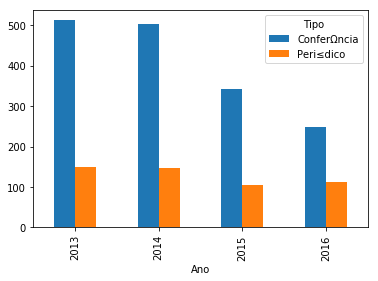

In [125]:
%matplotlib inline

prodPPGCByTipoporAno.size().unstack().plot.bar()

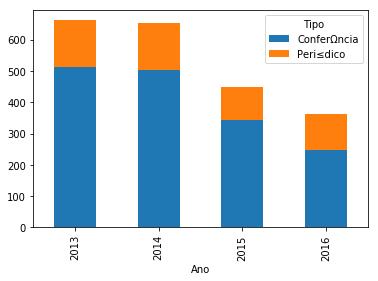

In [126]:
prodPPGCByTipoporAno.size().unstack().plot.bar(stacked=True)